# 2. Statistical Learning 

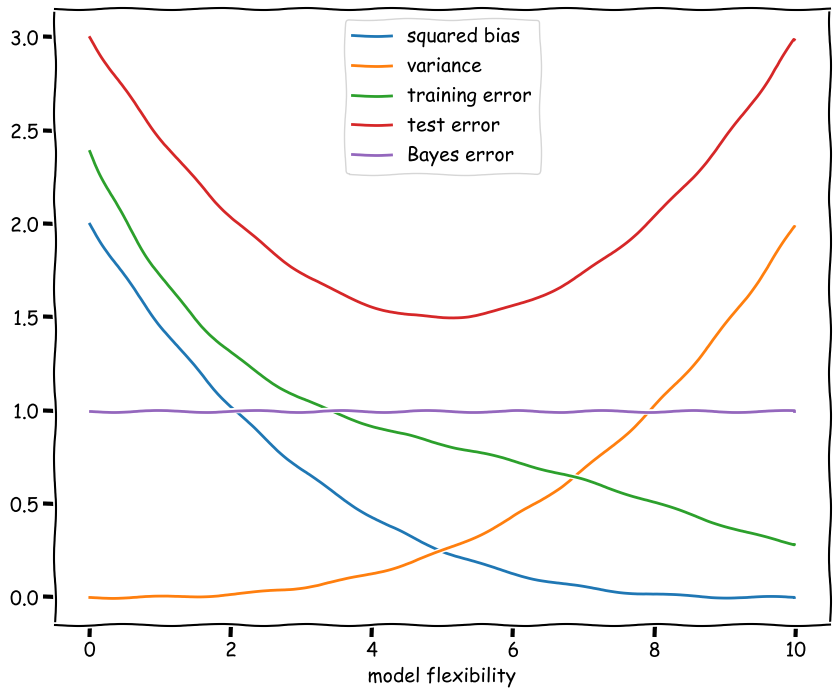

In [1]:
#2.3 Plot types of erroes

# the functions chosen here were chosen just as a rough, quick way to sketch the functions in a plot
# they do not represent in any way an analytical formula for these quantities or anything of the sort
# these formulas would depend on the model and fitting procedure in any case

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 10.0, 0.02)

def squared_bias(x):
    return .002*(-x+10)**3
def variance(x):
    return .002*x**3 
def training_error(x):
    return 2.38936 - 0.825077*x + 0.176655*x**2 - 0.0182319*x**3 + 0.00067091*x**4
def test_error(x):
    return 3 - 0.6*x + .06*x**2
def bayes_error(x):
    return x + 1 - x

plt.xkcd()
#frame = plt.gca()
#frame.axes.xaxis.set_ticklabels([])
plt.figure(figsize=(10, 8))
plt.plot(x,squared_bias(x), label='squared bias')
plt.plot(x, variance(x), label='variance')
plt.plot(x, training_error(x), label='training error')
plt.plot(x, test_error(x), label='test error')
plt.plot(x, bayes_error(x), label='Bayes error')
plt.legend(loc='upper center')
plt.xlabel('model flexibility')
plt.show()

#arbitrary units

In [2]:
#2.7 KNN
import numpy as np
import pandas as pd

d = {'X1': pd.Series([0,2,0,0,-1,1]),
     'X2': pd.Series([3,0,1,1,0,1]),
     'X3': pd.Series([0,0,3,2,1,1]),
     'Y': pd.Series(['Red','Red','Red','Green','Green','Red'])}
df = pd.DataFrame(d)
df.index = np.arange(1, len(df) + 1)
df

,X1,X2,X3,Y
1,0,3,0,Red
2,2,0,0,Red
3,0,1,3,Red
4,0,1,2,Green
5,-1,0,1,Green
6,1,1,1,Red


In [3]:
#2.7 a euclidean distance
from math import sqrt
df['distance']=np.sqrt(df['X1']**2+df['X2']**2+df['X3']**2)
df

,X1,X2,X3,Y,distance
1,0,3,0,Red,3.000000
2,2,0,0,Red,2.000000
3,0,1,3,Red,3.162278
4,0,1,2,Green,2.236068
5,-1,0,1,Green,1.414214
6,1,1,1,Red,1.732051


In [4]:
#2.7 b K=1 prediction
df.sort_values(['distance'])

,X1,X2,X3,Y,distance
5,-1,0,1,Green,1.414214
6,1,1,1,Red,1.732051
2,2,0,0,Red,2.000000
4,0,1,2,Green,2.236068
1,0,3,0,Red,3.000000
3,0,1,3,Red,3.162278


In [11]:
# 2.8 
import pandas as pd

df_c = pd.read_csv('data/College.csv')
df_college = df_c.set_index(['Unnamed: 0'], append=True, verify_integrity=True)
df_college.rename_axis([None, 'College'], inplace=True)
df_college.head()

,,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,College,,,,,,,,,,,,,,,,,,
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [10]:
df_college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


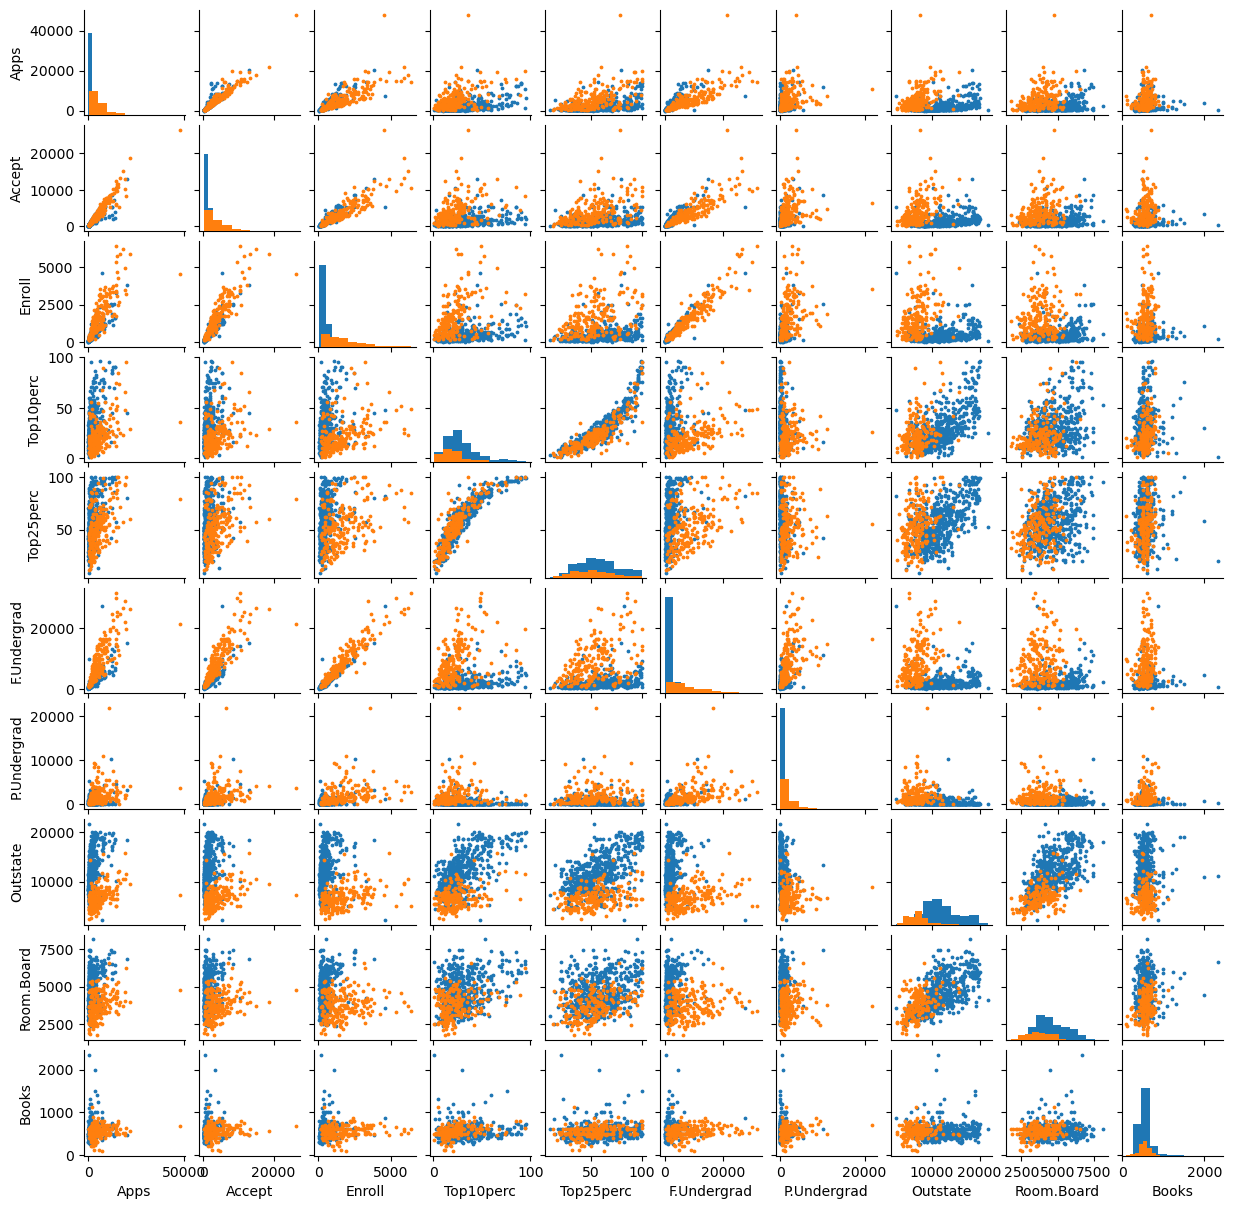

In [13]:
#2c
import seaborn as sns

plt.rcdefaults()

g = sns.PairGrid(df_college, vars=df_college.iloc[:,1:11], hue='Private')
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(plt.scatter, s=3)
g.fig.set_size_inches(12, 12)

<AxesSubplot: xlabel='Private', ylabel='Outstate'>

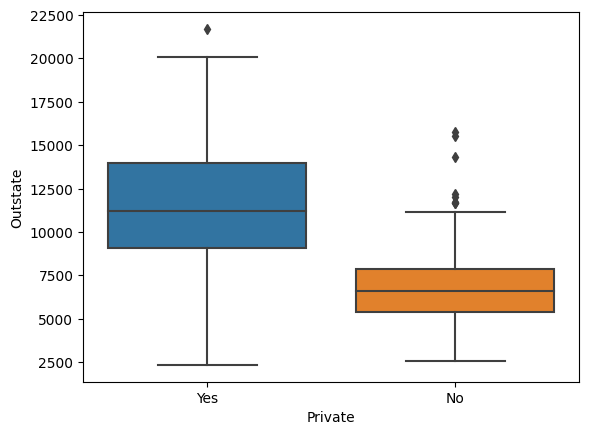

In [12]:
#2ciii
sns.boxplot(x=df_college['Private'], y=df_college['Outstate'])

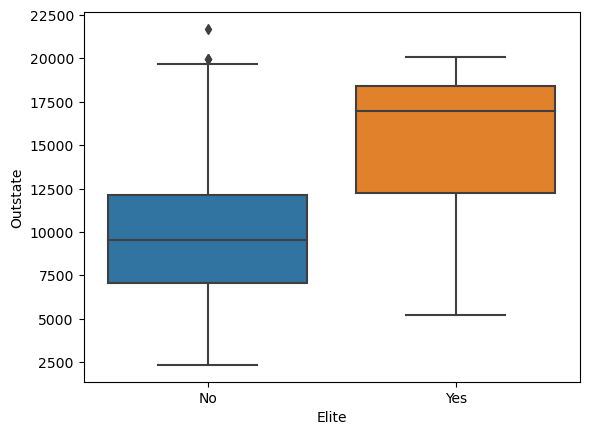

In [16]:
#2.8 iv elite boxplot

df_college.loc[df_college['Top10perc']>50, 'Elite'] = 'Yes'
df_college['Elite'] = df_college['Elite'].fillna('No')

sns.boxplot(x='Elite', y='Outstate', data=df_college);

/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWar

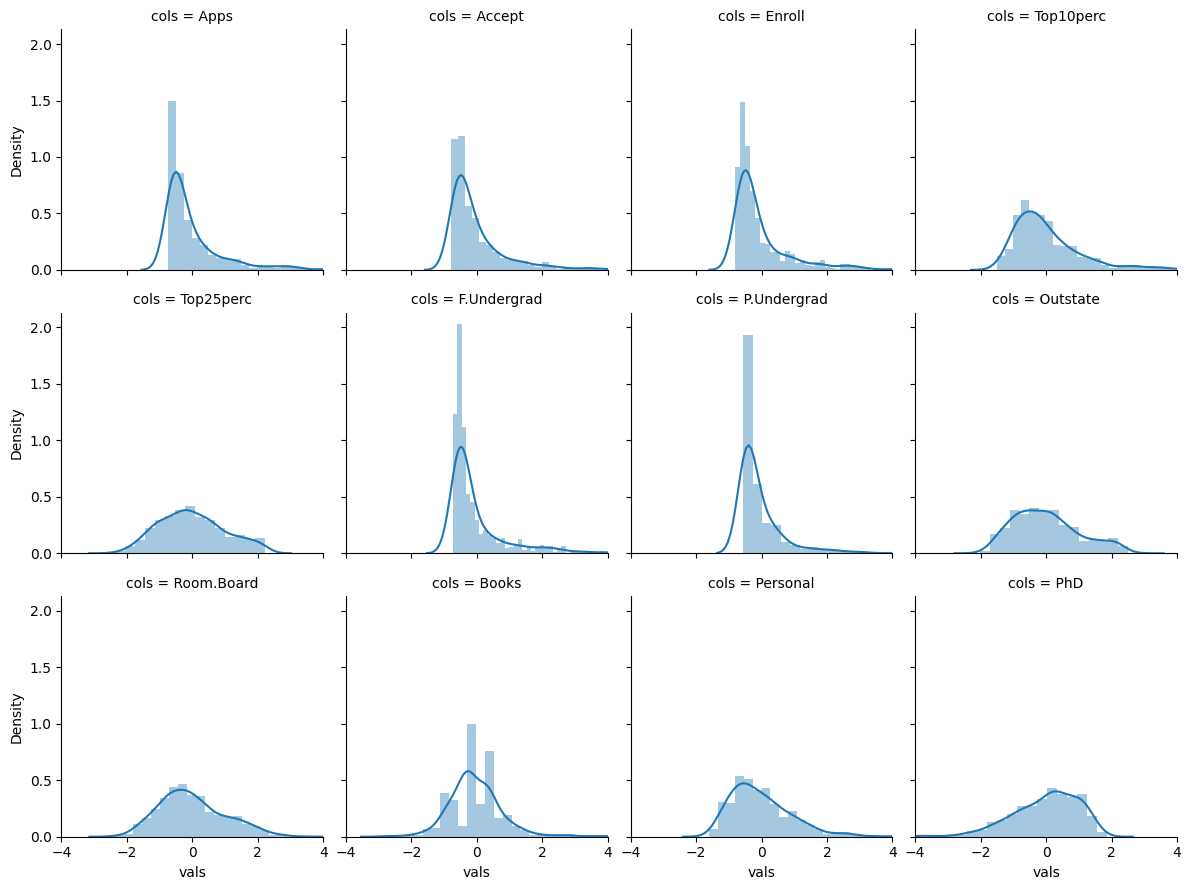

In [13]:
def scale(df):
    """Xi = Xi - mu(Xi) / s(Xi)
    mu -> mean
    s -> standard deviation"""
    return (df-df.mean())/(df.std())


feature_count = 12

# Remove units
df_norm = scale(df_college.iloc[:, 1:feature_count+1])
# Recast data into long format using melt
df_meltd = df_norm.melt(var_name='cols', value_name='vals')


# Plot grid of plots
g = sns.FacetGrid(df_meltd, col='cols', col_wrap=4)
g.map(sns.distplot, 'vals')
g.set(xlim=(-4, 4));

In [15]:
df_meltd.describe()

,vals
count,9.324000e+03
mean,2.514791e-17
std,9.994099e-01
min,-3.960045e+00
25%,-5.849458e-01
50%,-2.718639e-01
75%,4.035605e-01
max,1.378104e+01


In [18]:
#2.9
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format # Print only 2 decimal cases.

df = pd.read_csv('data/auto.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.00,8,307.00,130,3504,12.00,70,1,chevrolet chevelle malibu
1,15.00,8,350.00,165,3693,11.50,70,1,buick skylark 320
2,18.00,8,318.00,150,3436,11.00,70,1,plymouth satellite
3,16.00,8,304.00,150,3433,12.00,70,1,amc rebel sst
4,17.00,8,302.00,140,3449,10.50,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.00,4,140.00,86,2790,15.60,82,1,ford mustang gl
393,44.00,4,97.00,52,2130,24.60,82,2,vw pickup
394,32.00,4,135.00,84,2295,11.60,82,1,dodge rampage
395,28.00,4,120.00,79,2625,18.60,82,1,ford ranger


In [25]:
df.horsepower.unique()

df = df[df.horsepower != '?'].copy() # [1]
df['horsepower']=pd.to_numeric(df['horsepower'])

In [26]:
#2.9 a
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.00,8,307.00,130,3504,12.00,70,1,chevrolet chevelle malibu
1,15.00,8,350.00,165,3693,11.50,70,1,buick skylark 320
2,18.00,8,318.00,150,3436,11.00,70,1,plymouth satellite
3,16.00,8,304.00,150,3433,12.00,70,1,amc rebel sst
4,17.00,8,302.00,140,3449,10.50,70,1,ford torino


In [27]:
quantitative = df.select_dtypes(include=['number']).columns
quantitative

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [29]:
qualitative = df.select_dtypes(exclude=['number']).columns
qualitative

Index(['name'], dtype='object')

In [30]:
#2.9 b
# range of each quantitative predictor

a = df.describe()
a.loc['range'] = a.loc['max'] - a.loc['min']
a.loc['range']

mpg               37.60
cylinders          5.00
displacement     387.00
horsepower       184.00
weight         3,527.00
acceleration      16.80
year              12.00
origin             2.00
Name: range, dtype: float64

In [33]:
# c) Mean and standard deviation
a.loc[['mean','std', 'range']]


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mean,23.45,5.47,194.41,104.47,"2,977.58",15.54,75.98,1.58
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68,0.81
range,37.60,5.00,387.00,184.00,"3,527.00",16.80,12.00,2.00


In [ ]:
help(sns.PairGrid)

In [34]:
# d) remove 10 to 85th percentile

df_b = df.drop(df.index[10:85])
b = df_b.describe()
b.loc['range'] = b.loc['max'] - b.loc['min']
b.loc[['mean','std', 'range']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mean,24.37,5.38,187.88,101.00,"2,938.85",15.70,77.12,1.60
std,7.87,1.66,100.17,36.00,811.64,2.72,3.13,0.82
range,35.60,5.00,387.00,184.00,"3,348.00",16.30,12.00,2.00


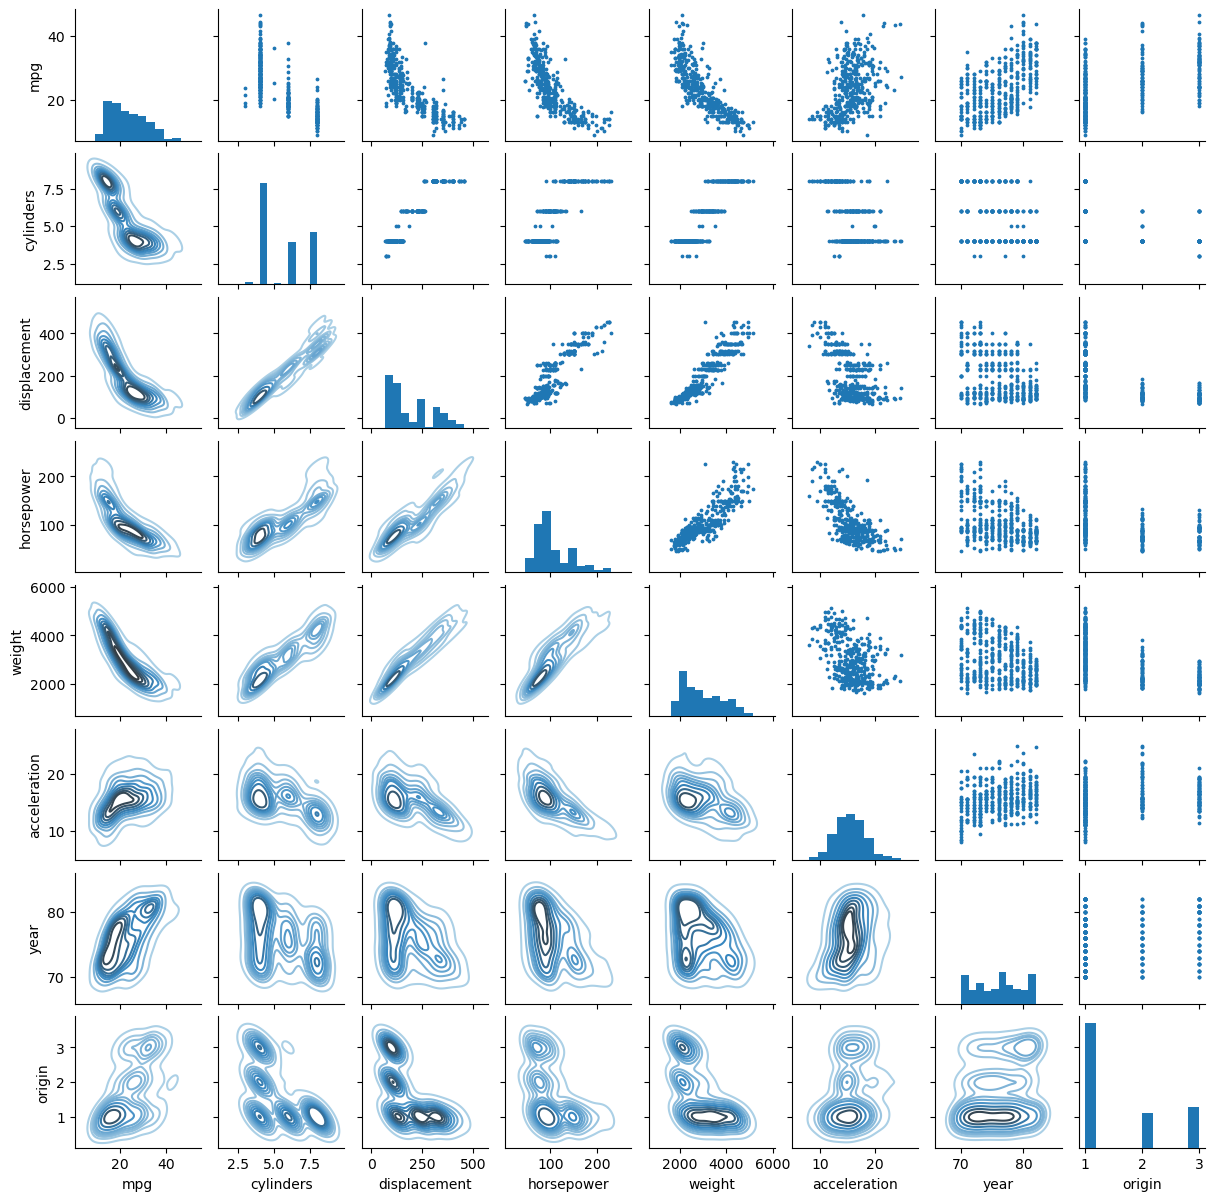

In [40]:
# e) graphs

import seaborn as sns


g = sns.PairGrid(df)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.fig.set_size_inches(12, 12)

In [ ]:
# 2.10 Boston housing data set

%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target

In [43]:
print(boston['DESCR'])


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [44]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [45]:
np.shape(df)

(506, 14)

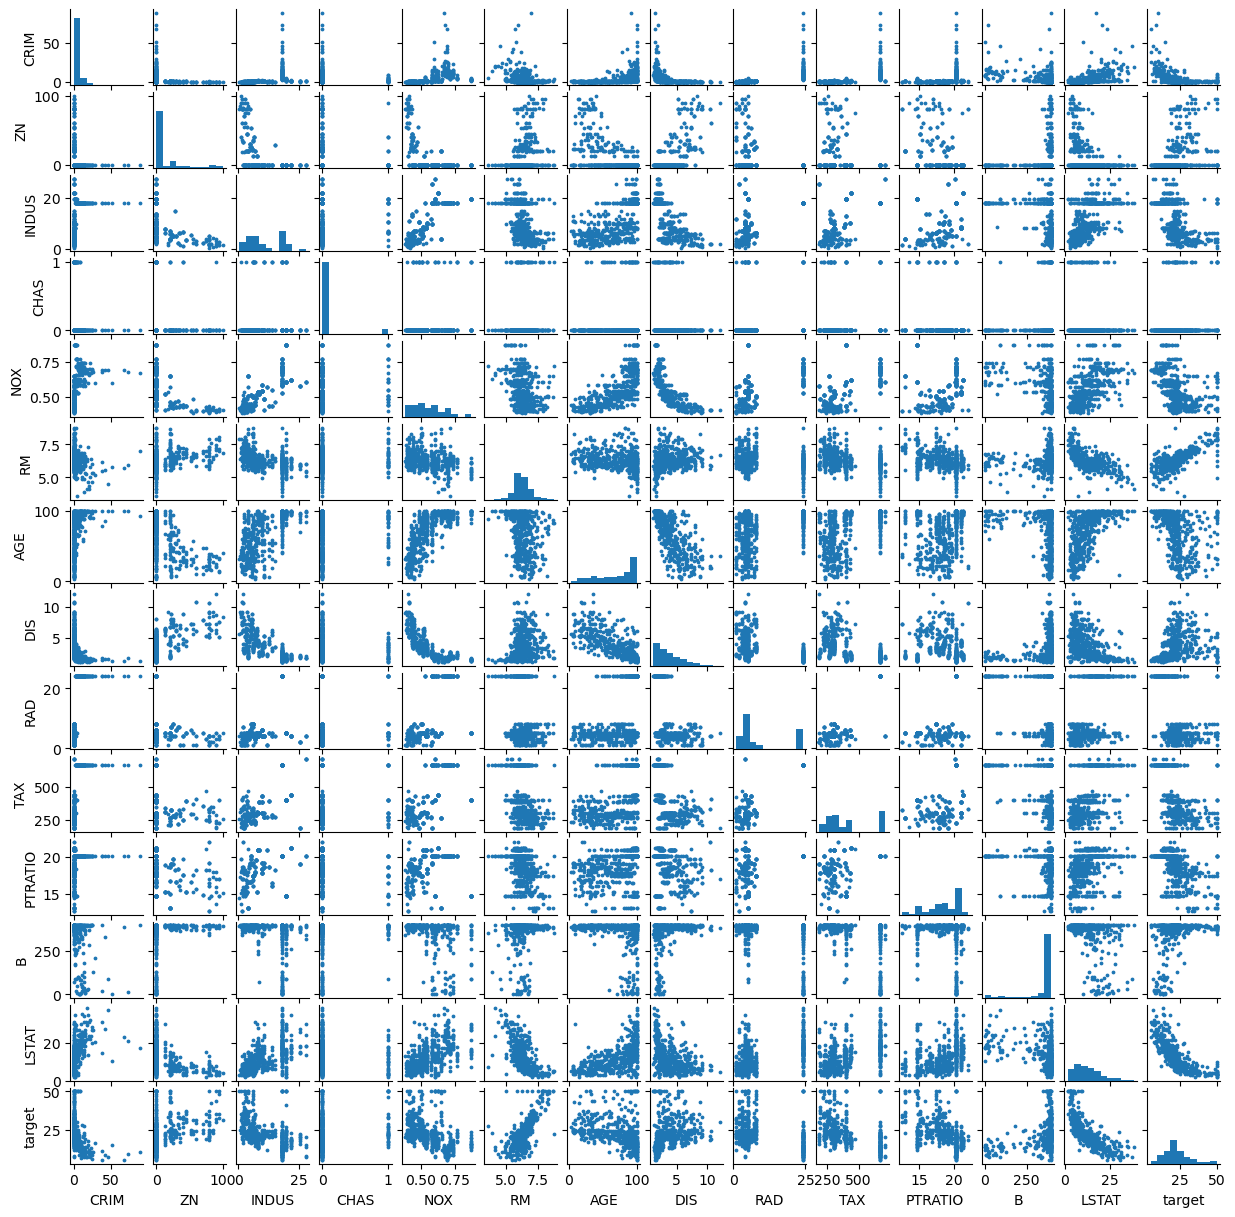

In [46]:
#2.10 b
g = sns.PairGrid(df)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(plt.scatter, s=3)
g.fig.set_size_inches(12, 12)

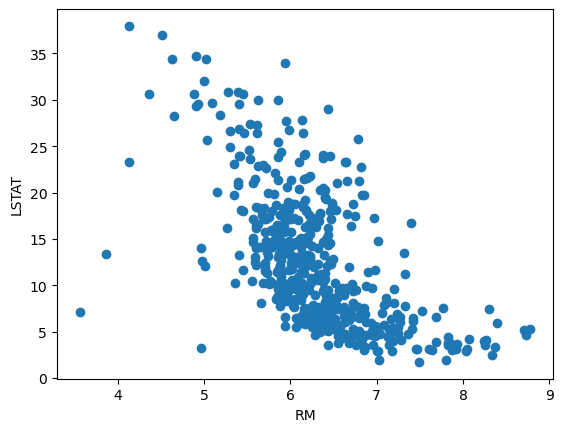

In [47]:
plt.scatter(df['RM'], df['LSTAT'])
plt.xlabel('RM')
plt.ylabel('LSTAT');

In [48]:
# c correlation with per capita crime rate

df.corrwith(df['CRIM']).sort_values()

target    -0.39
B         -0.39
DIS       -0.38
RM        -0.22
ZN        -0.20
CHAS      -0.06
PTRATIO    0.29
AGE        0.35
INDUS      0.41
NOX        0.42
LSTAT      0.46
TAX        0.58
RAD        0.63
CRIM       1.00
dtype: float64

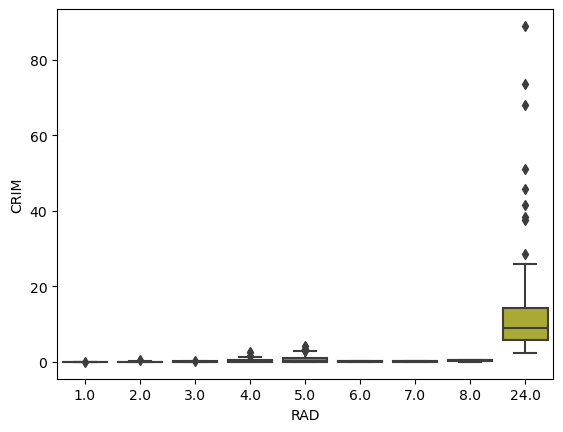

In [49]:
ax = sns.boxplot(x="RAD", y="CRIM", data=df)


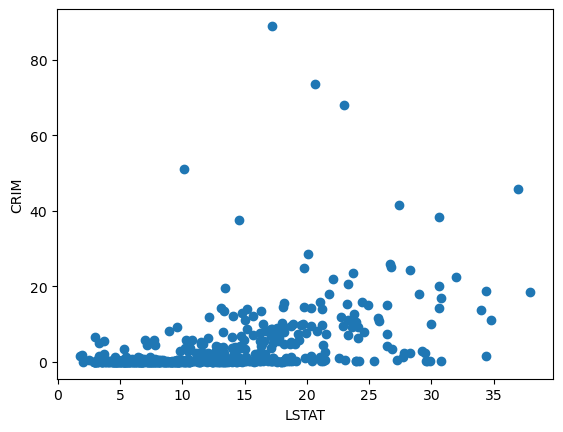

In [50]:
plt.scatter(df['LSTAT'], df['CRIM'])
plt.xlabel('LSTAT')
plt.ylabel('CRIM');

In [53]:
# d) Crime rate, tax rate and pupil-teacher ratio in suburbs
df.loc[df['CRIM'].nlargest(5).index]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
380,88.98,0.00,18.10,0.00,0.67,6.97,91.90,1.42,24.00,666.00,20.20,396.90,17.21,10.40
418,73.53,0.00,18.10,0.00,0.68,5.96,100.00,1.80,24.00,666.00,20.20,16.45,20.62,8.80
405,67.92,0.00,18.10,0.00,0.69,5.68,100.00,1.43,24.00,666.00,20.20,384.97,22.98,5.00
410,51.14,0.00,18.10,0.00,0.60,5.76,100.00,1.41,24.00,666.00,20.20,2.60,10.11,15.00
414,45.75,0.00,18.10,0.00,0.69,4.52,100.00,1.66,24.00,666.00,20.20,88.27,36.98,7.00


In [54]:
# e) Suburbs bounding the Charles river
df['CHAS'].value_counts()[1]


35

In [55]:
# (f) Median pupil-teacher ratio
df['PTRATIO'].median()


19.05

In [56]:
# (g) Suburb with lowest median value of owner occupied homes
df['target'].idxmin()


398

In [57]:
a = df.describe()
a.loc['range'] = a.loc['max'] - a.loc['min']
a.loc[398] = df.loc[398]
a

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00
range,88.97,100.00,27.28,1.00,0.49,5.22,97.10,11.00,23.00,524.00,9.40,396.58,36.24,45.00
398,38.35,0.00,18.10,0.00,0.69,5.45,100.00,1.49,24.00,666.00,20.20,396.90,30.59,5.00


In [58]:
# h) Number of rooms per dwelling
len(df[df['RM']>7])


64

In [59]:
len(df[df['RM']>8])


13

In [61]:
df[df['RM']>8].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00
mean,0.72,13.62,7.08,0.15,0.54,8.35,71.54,3.43,7.46,325.08,16.36,385.21,4.31,44.20
std,0.90,26.30,5.39,0.38,0.09,0.25,24.61,1.88,5.33,110.97,2.41,10.53,1.37,8.09
min,0.02,0.00,2.68,0.00,0.42,8.03,8.40,1.80,2.00,224.00,13.00,354.55,2.47,21.90
25%,0.33,0.00,3.97,0.00,0.50,8.25,70.40,2.29,5.00,264.00,14.70,384.54,3.32,41.70
50%,0.52,0.00,6.20,0.00,0.51,8.30,78.30,2.89,7.00,307.00,17.40,386.86,4.14,48.30
75%,0.58,20.00,6.20,0.00,0.60,8.40,86.50,3.65,8.00,307.00,17.40,389.70,5.12,50.00
max,3.47,95.00,19.58,1.00,0.72,8.78,93.90,8.91,24.00,666.00,20.20,396.90,7.44,50.00


In [62]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00
